# Séries temporais de dados financeiros

Bibliotecas utilizadas

In [107]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
from matplotlib.patches import Polygon
import numpy as np 
import pandas as pd

In [108]:
plt.style.use('bmh')
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = '12'
plt.rcParams['axes.grid'] = False

Carregamento dos dados

In [109]:
filename = '../data/tr_eikon_eod_data.csv'
data = pd.read_csv(filename, index_col=0, parse_dates=True)

In [110]:
data.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


In [111]:
instruments = [
    'Apple Stock', 'Microsoft Stock',
    'Intel Stock', 'Amazon Stock', 'Goldman Sachs Stock',
    'SPDR S&P 500 ETF Trust', 'S&P 500 Index',
    'VIX Volatility Index', 'EUR/USD Exchange Rate',
    'Gold Price', 'VanEck Vectors Gold Miners ETF',
    'SPDR Gold Trust'
]

for ric, name in zip(data.columns, instruments):
    print(f'{ric:8s} | {name}')

AAPL.O   | Apple Stock
MSFT.O   | Microsoft Stock
INTC.O   | Intel Stock
AMZN.O   | Amazon Stock
GS.N     | Goldman Sachs Stock
SPY      | SPDR S&P 500 ETF Trust
.SPX     | S&P 500 Index
.VIX     | VIX Volatility Index
EUR=     | EUR/USD Exchange Rate
XAU=     | Gold Price
GDX      | VanEck Vectors Gold Miners ETF
GLD      | SPDR Gold Trust


## Resumos estatísticos

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


In [113]:
data.describe().round(2)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
count,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2216.00,2211.00,2138.00,2138.00
mean,93.46,44.56,29.36,480.46,170.22,180.32,1802.71,17.03,1.25,1349.01,33.57,130.09
std,40.55,19.53,8.17,372.31,42.48,48.19,483.34,5.88,0.11,188.75,15.17,18.78
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.14,1.04,1051.36,12.47,100.50
25%,60.29,28.57,22.51,213.60,146.61,133.99,1338.57,13.07,1.13,1221.53,22.14,117.40
50%,90.55,39.66,27.33,322.06,164.43,186.32,1863.08,15.58,1.27,1292.61,25.62,124.00
75%,117.24,54.37,34.71,698.85,192.13,210.99,2108.94,19.07,1.35,1428.24,48.34,139.00
max,193.98,102.49,57.08,1750.08,273.38,286.58,2872.87,48.00,1.48,1898.99,66.63,184.59


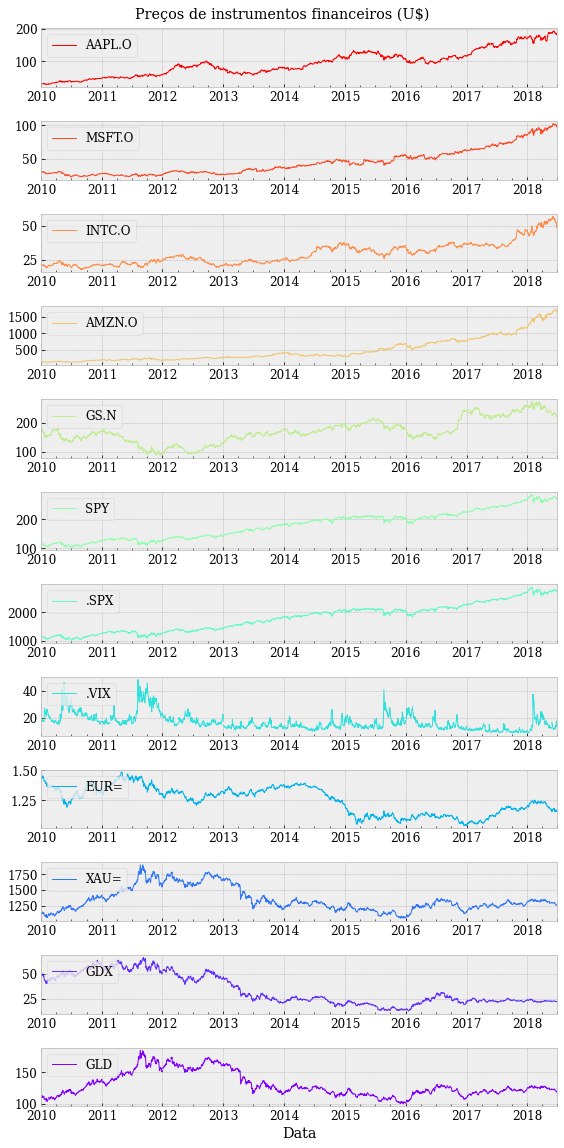

In [114]:
n = len(data.columns)
cmap=plt.cm.get_cmap(plt.cm.rainbow_r, 143)
fig, ax = plt.subplots(n, 1, figsize=(8, 16))
plt.suptitle('Preços de instrumentos financeiros (U$)')
for ric, i in zip(data.columns, range(n)):
    data[ric].plot(ax = ax[i], label=ric, lw=1, c=cmap(2*n*i))
    ax[i].legend(loc=2)
    ax[i].grid(True)
    ax[i].set_xlabel(None)
plt.tight_layout()
plt.xlabel('Data')
plt.show()

## Diferenças ao decorrer do tempo

In [115]:
data.diff().head().mean()

AAPL.O   -0.163333
MSFT.O   -0.166000
INTC.O   -0.093333
AMZN.O   -1.300000
GS.N      1.530000
SPY       0.286667
.SPX      2.900000
.VIX     -0.326667
EUR=     -0.000125
XAU=      8.887500
GDX       0.463333
GLD       0.340000
dtype: float64

In [116]:
avg_diff = data.diff().head().mean().to_frame()

avg_diff

,0
AAPL.O,-0.163333
MSFT.O,-0.166000
INTC.O,-0.093333
AMZN.O,-1.300000
GS.N,1.530000
SPY,0.286667
.SPX,2.900000
.VIX,-0.326667
EUR=,-0.000125
XAU=,8.887500


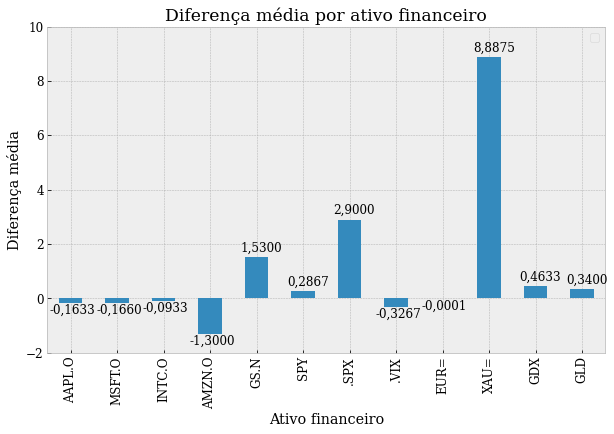

In [117]:
ax = avg_diff.plot.bar(figsize=(10,6))
ax.set_axisbelow(True)
ax.set_title('Diferença média por ativo financeiro')
ax.set_xlabel('Ativo financeiro')
ax.set_ylabel('Diferença média')
ax.set_ylim(-2, 10)
for i in ax.patches:
    if i.get_height() >= 0:
        ax.text(i.get_x() - .1, i.get_height() + .2, f"{i.get_height():.4f}".replace('.', ','))
    else:
        ax.text(i.get_x() - .2, i.get_height() - .4, f"{i.get_height():.4f}".replace('.', ','))
plt.grid(True)
plt.legend([])
plt.show()

### Retornos logarítimicos

$$r_t = \log{ \left(\dfrac{P_t}{P_{t-1}} \right)}$$

In [118]:
rets = np.log(data / data.shift(1))
rets.head().round(2)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.02,NaN,NaN
2010-01-05,0.00,0.00,-0.00,0.01,0.02,0.0,0.0,-0.04,-0.00,-0.00,0.01,-0.00
2010-01-06,-0.02,-0.01,-0.00,-0.02,-0.01,0.0,0.0,-0.01,0.00,0.02,0.02,0.02
2010-01-07,-0.00,-0.01,-0.01,-0.02,0.02,0.0,0.0,-0.01,-0.01,-0.01,-0.00,-0.01


Retorno logarítmico acumulado

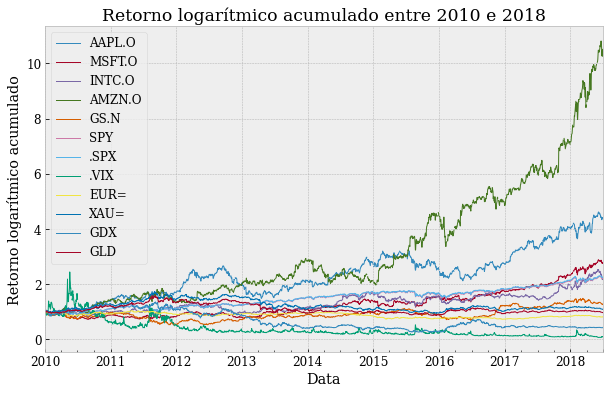

In [119]:
ax = rets.cumsum().apply(np.exp).plot(figsize=(10, 6), lw=1)
ax.set_xlabel('Data')
ax.set_ylabel('Retorno logarítmico acumulado')
ax.set_title(f'Retorno logarítmico acumulado entre {data.index.min().year} e {data.index.max().year}')
plt.grid(True)
plt.show()

### Reamostragem

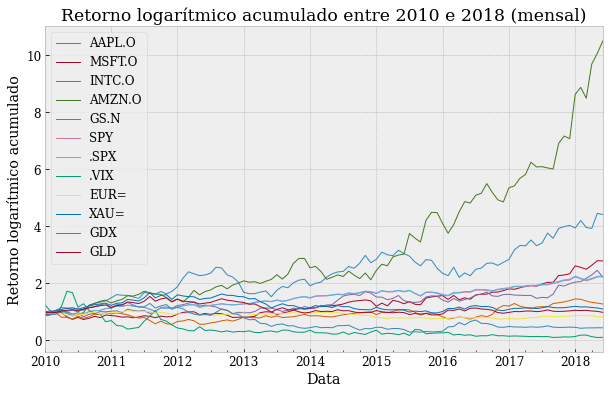

In [120]:
ax = rets.cumsum().apply(np.exp).resample('1m', label='right').last().plot(figsize=(10,6), lw=1)
ax.set_xlabel('Data')
ax.set_ylabel('Retorno logarítmico acumulado')
ax.set_title(f'Retorno logarítmico acumulado entre {data.index.min().year} e {data.index.max().year} (mensal)')
plt.grid(True)

## Estatísticas móveis

In [121]:
sym = 'AAPL.O'
df = pd.DataFrame(data[sym]).dropna()
df.tail()

,AAPL.O
Date,
2018-06-25,182.17
2018-06-26,184.43
2018-06-27,184.16
2018-06-28,185.50
2018-06-29,185.11


In [122]:
window = 20
df['min'] = df[sym].rolling(window=window).min()
df['mean'] = df[sym].rolling(window=window).mean()
df['std'] = df[sym].rolling(window=window).std()
df['median'] = df[sym].rolling(window=window).median()
df['max'] = df[sym].rolling(window=window).max()
df['ewma'] = df[sym].ewm(halflife=0.5, min_periods=window).mean()

In [123]:
df.dropna().head()

,AAPL.O,min,mean,std,median,max,ewma
Date,,,,,,,
2010-02-01,27.818544,27.437544,29.580892,0.933650,29.821542,30.719969,27.805432
2010-02-02,27.979972,27.437544,29.451249,0.968048,29.711113,30.719969,27.936337
2010-02-03,28.461400,27.437544,29.343035,0.950665,29.685970,30.719969,28.330134
2010-02-04,27.435687,27.435687,29.207892,1.021129,29.547113,30.719969,27.659299
2010-02-05,27.922829,27.435687,29.099892,1.037811,29.419256,30.719969,27.856947


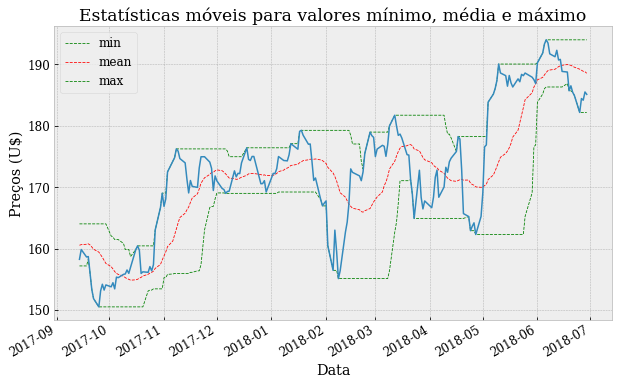

In [125]:
ax = df[['min', 'mean', 'max']].iloc[-200:].plot(
    figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8
)
df[sym].iloc[-200:].plot(ax = ax, lw=1.5)
plt.xlabel('Data')
plt.ylabel('Preços (U$)')
plt.title('Estatísticas móveis para valores mínimo, média e máximo')
plt.grid(True)
plt.show()

## Análise Técnica

A ideia é que o _trader_ deve comprar uma ação quando a SMA de curto prazo estiver acima da SMA de longo prazo e vender quando o oposto for verdadeiro.

In [129]:
sym = 'AAPL.O'
df2 = pd.DataFrame(data[sym]).dropna()
for window in [42, 252]:
    df2[f'SMA{window}'] = df2[sym].rolling(window=window).mean()
df2.tail()

,AAPL.O,SMA42,SMA252
Date,,,
2018-06-25,182.17,185.606190,168.265556
2018-06-26,184.43,186.087381,168.418770
2018-06-27,184.16,186.607381,168.579206
2018-06-28,185.50,187.089286,168.736627
2018-06-29,185.11,187.470476,168.901032


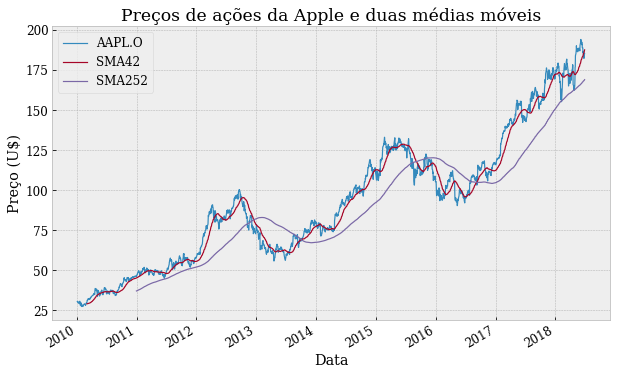

In [134]:
ax = df2.plot(figsize=(10, 6), lw=1.2)
ax.set_xlabel('Data')
ax.set_ylabel('Preço (U$)')
ax.set_title('Preços de ações da Apple e duas médias móveis')
plt.grid(True)
plt.show()

Definição de uma estratégia de _trading_.

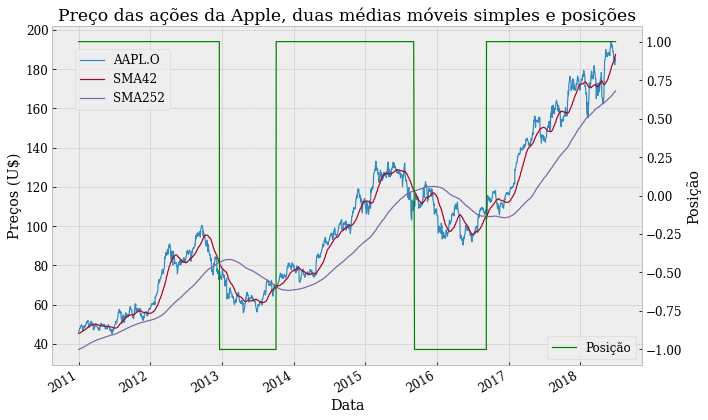

In [171]:
df2.dropna(inplace=True)
df2['positions'] = np.where(df2['SMA42'] > df2['SMA252'], 1, -1)
ax = df2[[sym, 'SMA42', 'SMA252']].plot(figsize=(10, 6), lw=1.2)
ax.set_xlabel('Data')
ax.set_ylabel('Preços (U$)')
ax.set_title('Preço das ações da Apple, duas médias móveis simples e posições')
ax.get_legend().set_bbox_to_anchor((0.21, 0.95))
ax.grid(True)

ax2 = ax.twinx()
ax2.plot(df2['positions'], color='green', lw=1.2, label='Posição')
ax2.set_ylabel('Posição')
ax2.legend(loc=4)

plt.tight_layout()
plt.show()

## Análise de Correlação

In [172]:
raw = pd.read_csv('../data/tr_eikon_eod_data.csv', index_col=0, parse_dates=True)
data = raw[['.SPX', '.VIX']].dropna()
data.tail()

,.SPX,.VIX
Date,,
2018-06-25,2717.07,17.33
2018-06-26,2723.06,15.92
2018-06-27,2699.63,17.91
2018-06-28,2716.31,16.85
2018-06-29,2718.37,16.09


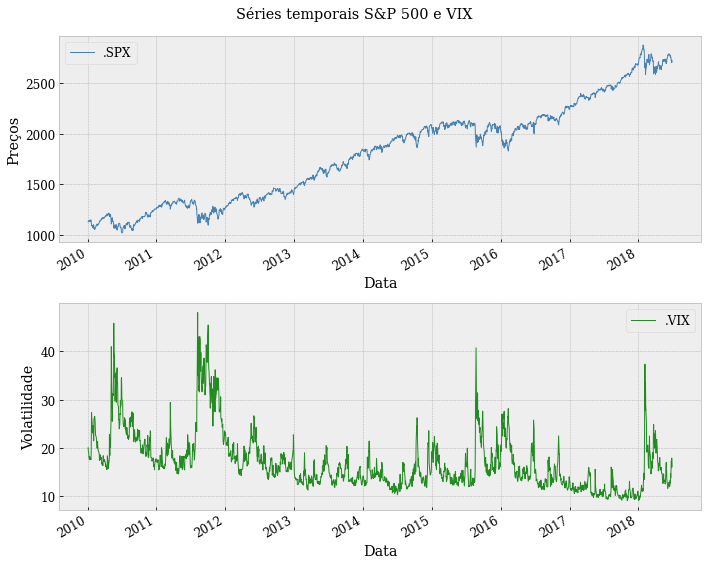

In [185]:
c = ['steelblue', 'forestgreen']
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
for i, ylab in zip(range(2), ['Preços', 'Volatilidade']):
    data.iloc[:, i].plot(c=c[i], lw=1, ax=ax[i])
    ax[i].set_xlabel('Data')
    ax[i].set_ylabel(ylab)
    ax[i].grid()
    ax[i].legend()
plt.suptitle('Séries temporais S&P 500 e VIX')
plt.tight_layout()
plt.show()

In [187]:
rets = np.log(data / data.shift(1))
rets.dropna(inplace=True)
rets.head()

,.SPX,.VIX
Date,,
2010-01-05,0.003111,-0.035038
2010-01-06,0.000545,-0.009868
2010-01-07,0.003993,-0.005233
2010-01-08,0.002878,-0.050024
2010-01-11,0.001745,-0.032514


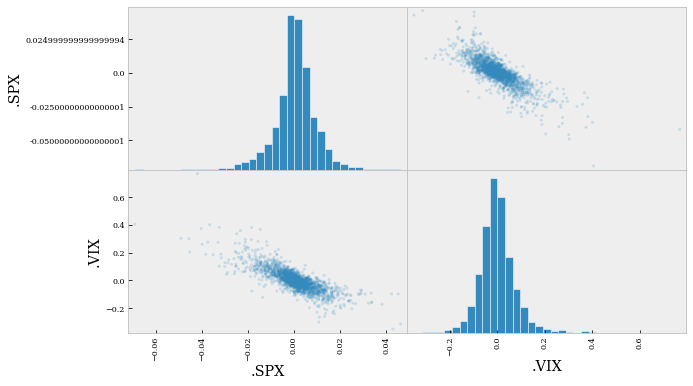

In [212]:
ax = pd.plotting.scatter_matrix(rets, alpha=.2, diagonal='hist', hist_kwds={'bins':35, 'edgecolor':'white'}, figsize=(10, 6))
plt.show()

## Regressão

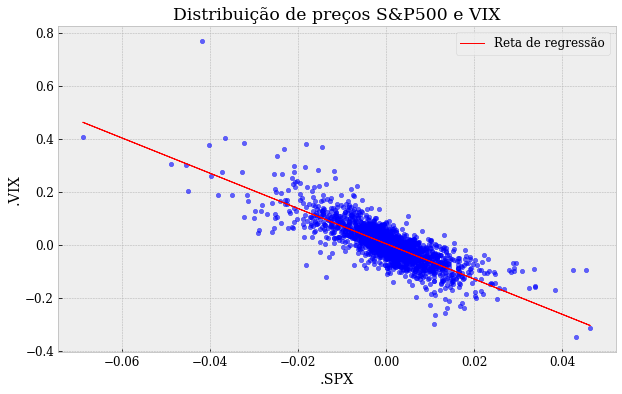

In [204]:
reg = np.polyfit(rets['.SPX'], rets['.VIX'], deg=1)
ax = rets.plot(kind='scatter', x='.SPX', y='.VIX', figsize=(10, 6), alpha=.6)
ax.plot(rets['.SPX'], np.polyval(reg, rets['.SPX']), 'r', lw=1, label='Reta de regressão')
ax.set_title('Distribuição de preços S&P500 e VIX')
ax.set_axisbelow(True)
plt.legend()
plt.grid()
plt.show()

In [205]:
rets.corr()

,.SPX,.VIX
.SPX,1.000000,-0.804382
.VIX,-0.804382,1.000000


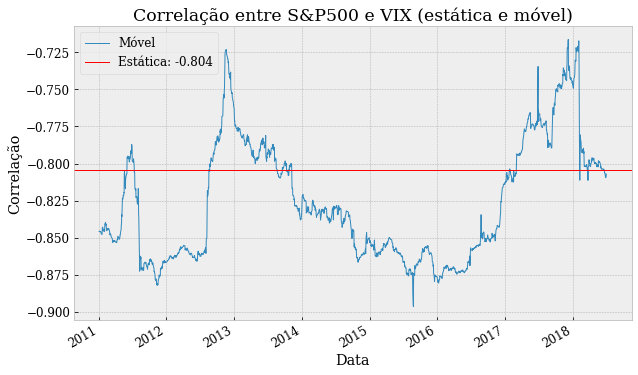

In [223]:
ax = rets['.SPX'].rolling(window=252).corr(rets['.VIX']).plot(figsize=(10, 6), lw=1, label='Móvel')
ax.axhline(rets.corr().iloc[0, 1], c='r', lw=1, label=f'Estática: {rets.corr().iloc[0, 1]:.3f}')
ax.set_xlabel('Data')
ax.set_ylabel('Correlação')
ax.set_title('Correlação entre S&P500 e VIX (estática e móvel)')
ax.legend(loc=2)
plt.grid()
plt.show()
